In [8]:
import networkx as nx

In [9]:
max([1,2,3,4,5])

5

In [10]:
max(['apple', 'grape', 'carrot'])

'grape'

In [5]:
max(['apple', 'grape', 'carrot'], key=len)

'carrot'

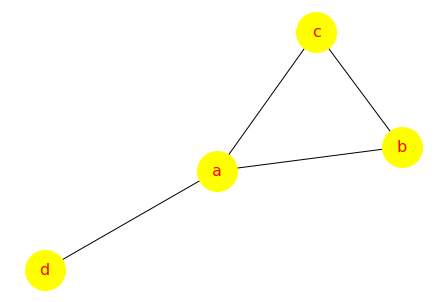

In [12]:
G=nx.Graph()
G.add_nodes_from(['a','b','c','d'])
G.add_edges_from([('a','b'),('b','c'),('a','c'),('a','d')])
nx.draw(G,with_labels=True,node_color='yellow',node_size=1600,font_color='red',font_size=16)

In [13]:
highest_degree_node = max(G.nodes, key=G.degree)
highest_degree_node

'a'

In [14]:
G.degree(highest_degree_node)

3

In [15]:
betweenness = nx.centrality.betweenness_centrality(G)
highest_betweenness_node = max(G.nodes, key=betweenness.get)
highest_betweenness_node

'a'

In [16]:
betweenness[highest_betweenness_node]

0.6666666666666666

In [18]:
import statistics

print('Mean degree:', statistics.mean(degree_sequence))
print('Median degree:', statistics.median(degree_sequence))

Mean degree: 2
Median degree: 2.0


In [19]:
betweenness = nx.centrality.betweenness_centrality(G)
betweenness_sequence = list(betweenness.values())

print('Mean betweenness:', statistics.mean(betweenness_sequence))
print('Median betweenness:', statistics.median(betweenness_sequence))

Mean betweenness: 0.16666666666666666
Median betweenness: 0.0


In [20]:
from collections import Counter

degree_counts = Counter(degree_sequence)
degree_counts

Counter({3: 1, 2: 2, 1: 1})

In [21]:
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())

plot_x = list(range(min_degree, max_degree + 1))

In [22]:
plot_y = [degree_counts.get(x, 0) for x in plot_x]

<BarContainer object of 3 artists>

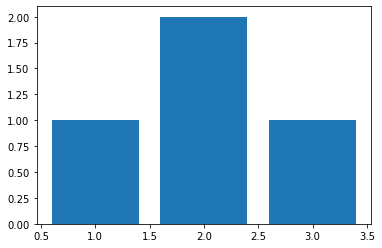

In [23]:
import matplotlib.pyplot as plt

plt.bar(plot_x, plot_y)

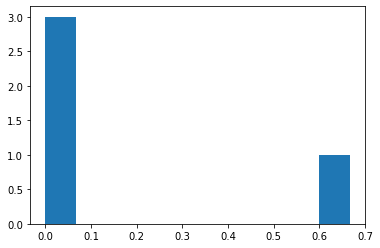

In [24]:
counts, bins, patches = plt.hist(betweenness_sequence, bins=10)

In [25]:
bins

array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
       0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
       0.66666667])

In [26]:
counts

array([3., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [27]:
core = next(nx.connected_components(G))
core

{'a', 'b', 'c', 'd'}

In [28]:
len(core)

4

In [29]:
components = list(nx.connected_components(G))

In [30]:
len(components)

1

In [31]:
C = G.copy()

In [32]:
import random

nodes_to_remove = random.sample(list(C.nodes), 2)
C.remove_nodes_from(nodes_to_remove)

In [38]:
number_of_steps = 3
M = G.number_of_nodes() // number_of_steps
M

1

In [39]:
num_nodes_removed = range(0, G.number_of_nodes(), M)

In [40]:
N = G.number_of_nodes()
C = G.copy()
random_attack_core_proportions = []
for nodes_removed in num_nodes_removed:
    # Measure the relative size of the network core
    core = next(nx.connected_components(C))
    core_proportion = len(core) / N
    random_attack_core_proportions.append(core_proportion)
    
    # If there are more than M nodes, select M nodes at random and remove them
    if C.number_of_nodes() > M:
        nodes_to_remove = random.sample(list(C.nodes), M)
        C.remove_nodes_from(nodes_to_remove)

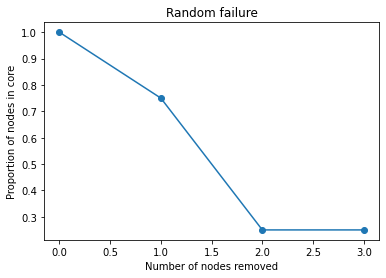

In [41]:
plt.title('Random failure')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_nodes_removed, random_attack_core_proportions, marker='o')

In [42]:
nodes_sorted_by_degree = sorted(G.nodes, key=G.degree, reverse=True)
top_degree_nodes = nodes_sorted_by_degree[:M]
top_degree_nodes

['a']